In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import analysis

In [6]:
result_summary = pd.read_csv("summary.csv").head()
result_summary

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
0,2025-05-18 21:42,Normal,data/run/test.toml,data/result/2025-05-18 21:42_Normal/loss.dat,data/result/2025-05-18 21:42_Normal/val_loss.dat,5.004520,-2.372256,4.406543,data/result/2025-05-18 21:42_Normal/result.csv,0:21:04.154756,Base test
1,2025-05-19 06:48,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 06:48_Custom Model Chec...,data/result/2025-05-19 06:48_Custom Model Chec...,4.001656,0.430788,3.978401,data/result/2025-05-19 06:48_Custom Model Chec...,0:29:12.068107,Monitor loss
2,2025-05-19 09:09,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 09:09_Custom Model Chec...,data/result/2025-05-19 09:09_Custom Model Chec...,3.650280,1.068165,3.490497,data/result/2025-05-19 09:09_Custom Model Chec...,0:19:37.964186,Monitor val_mae
3,2025-05-19 09:31,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 09:31_Custom Model Chec...,data/result/2025-05-19 09:31_Custom Model Chec...,3.967415,-0.478311,3.938477,data/result/2025-05-19 09:31_Custom Model Chec...,0:19:06.399232,Monitor mae


In [3]:
data = result_summary.loc[2, "output_file"]
df = pd.read_csv(data)
df

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,target,prediction,difference
0,8.0,8.0,1.0,1.0,6.349604,22.223615,0.000000,0.250000,-118.0,-118.0,-2.688779,-2.386000,-0.302779
1,9.0,8.0,-1.0,1.0,6.611489,21.779023,0.058824,0.242536,-117.0,-118.0,1.328922,0.284370,1.044552
2,10.0,8.0,1.0,1.0,6.868285,21.367999,0.222222,0.235702,-116.0,-118.0,0.948460,-1.493621,2.442080
3,11.0,8.0,-1.0,1.0,7.120367,20.986346,0.473684,0.229416,-115.0,-118.0,5.213544,3.548317,1.665227
4,12.0,8.0,1.0,1.0,7.368063,20.630576,0.800000,0.223607,-114.0,-118.0,3.233313,1.908246,1.325067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,245.0,110.0,-1.0,1.0,50.136295,1693.335703,51.338028,0.053074,119.0,-16.0,522.201200,520.735050,1.466154
6421,246.0,110.0,1.0,1.0,50.230403,1691.748696,51.955056,0.053000,120.0,-16.0,529.713500,526.227800,3.485717
6422,247.0,110.0,-1.0,1.0,50.324424,1690.167622,52.574230,0.052926,121.0,-16.0,537.315900,532.844700,4.471173
6423,248.0,110.0,1.0,1.0,50.418356,1688.592441,53.195531,0.052852,122.0,-16.0,544.664900,538.253360,6.411543


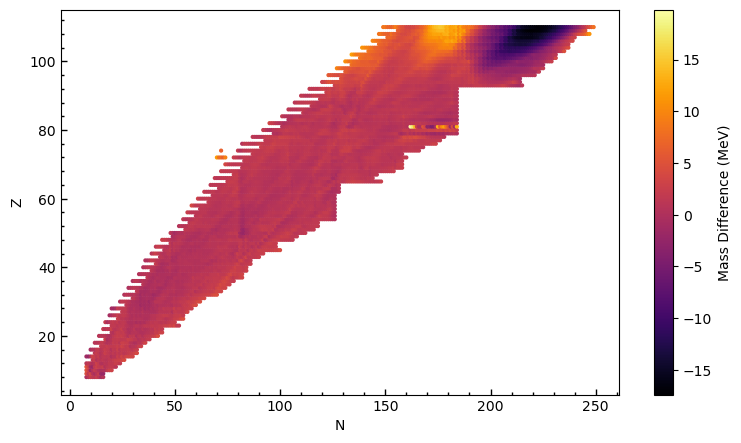

In [4]:
analysis.plot.nuclear_landscape(
    df["param_1"],
    df["param_2"],
    df["difference"],
    colourbar_label="Mass Difference (MeV)",
)

In [22]:
df[(df["param_2"] == 81) & (df["param_1"] > 150)]

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,target,prediction,difference
3851,151.0,81.0,-1.0,-1.0,37.756523,1054.578738,21.120690,0.065653,25.0,-45.0,86.46264,86.163150,0.299493
3852,152.0,81.0,1.0,-1.0,37.864941,1053.067878,21.635193,0.065512,26.0,-45.0,90.38590,90.270584,0.115316
3853,153.0,81.0,-1.0,-1.0,37.973204,1051.565639,22.153846,0.065372,27.0,-45.0,96.49031,96.416145,0.074165
3854,154.0,81.0,1.0,-1.0,38.081312,1050.071936,22.676596,0.065233,28.0,-45.0,100.87280,100.519900,0.352903
3855,155.0,81.0,-1.0,-1.0,38.189268,1048.586684,23.203390,0.065094,29.0,-45.0,107.06090,106.733230,0.327669
3856,156.0,81.0,1.0,-1.0,38.297071,1047.109799,23.734177,0.064957,30.0,-45.0,111.70740,111.307670,0.399729
3857,157.0,81.0,-1.0,-1.0,38.404723,1045.641200,24.268908,0.064820,31.0,-45.0,118.06800,117.393460,0.674537
3858,158.0,81.0,1.0,-1.0,38.512224,1044.180805,24.807531,0.064685,32.0,-45.0,122.95320,122.430595,0.522605
3859,159.0,81.0,-1.0,-1.0,38.619575,1042.728535,25.350000,0.064550,33.0,-45.0,129.67380,128.516390,1.157412
3860,160.0,81.0,1.0,-1.0,38.726778,1041.284311,25.896266,0.064416,34.0,-45.0,134.51370,133.882770,0.630933


<Axes: xlabel='note'>

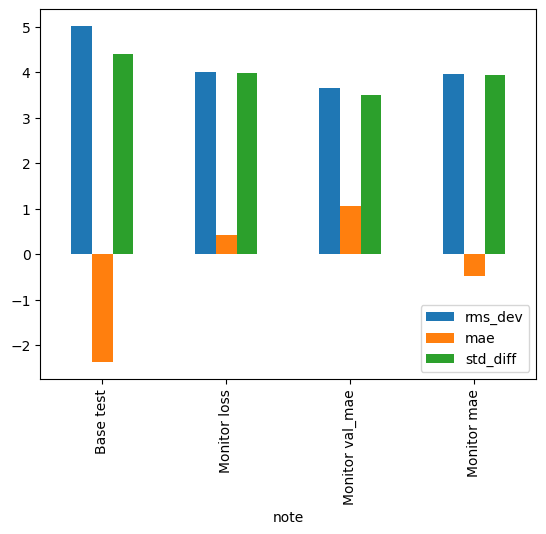

In [ ]:
result_summary.loc[:,'note']=
result_summary.plot(kind="bar", x="note", y=["rms_dev", "mae", "std_diff"])